In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
import datetime as dt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Data Import**

**Coteq**

In [2]:
data0= pd.read_csv('/content/drive/My Drive/Gas/coteq_gas_2015.csv')
data0['Year'] = '2015'
data1= pd.read_csv('/content/drive/My Drive/Gas/coteq_gas_2016.csv')
data1['Year'] = '2016'
data2= pd.read_csv('/content/drive/My Drive/Gas/coteq_gas_2017.csv')
data2['Year'] = '2017'
data3= pd.read_csv('/content/drive/My Drive/Gas/coteq_gas_2018.csv')
data3['Year'] = '2018'
data4= pd.read_csv('/content/drive/My Drive/Gas/coteq_gas_2019.csv')
data4['Year'] = '2019'
data5= pd.read_csv('/content/drive/My Drive/Gas/coteq_gas_2014.csv')
data5['Year'] = '2014'
listd= [data0,data1,data2,data3,data4,data5]
coteq= pd.concat (listd, axis=0, sort=False)
del [data0,data1,data2,data3,data4,data5]
coteq

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,Year
0,Coteq Netbeheer BV,GAS Gastransport Services (GASUNIE),Margrietstraat,4175GA,7165BD,HAAFTEN,18,100.0,83.33,78,G4,3457,0.0,0.0,2015
1,Coteq Netbeheer BV,GAS Gastransport Services (GASUNIE),Oude Deldenseweg,7165BG,7216PN,RIETMOLEN,17,100.0,100.00,76,G4,4036,0.0,0.0,2015
2,Coteq Netbeheer BV,GAS Gastransport Services (GASUNIE),Wippertdijk,7216PP,7245TG,KRING VAN DORTH,117,100.0,100.00,71,G4,3695,0.0,0.0,2015
3,Coteq Netbeheer BV,GAS Gastransport Services (GASUNIE),Warfveendijk,7245TH,7245TP,LAREN GLD,26,100.0,100.00,62,G4,3307,0.0,0.0,2015
4,Coteq Netbeheer BV,GAS Gastransport Services (GASUNIE),Kielersdijk,7245TS,7275AZ,LAREN GLD,81,100.0,97.53,78,G4,2306,0.0,0.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6769,Coteq Netbeheer BV,GAS Gastransport Services (GASUNIE),Doozemansteeg,7798CH,7798CJ,COLLENDOORN,22,100.0,100.00,95,G4,2474,0.0,0.0,2014
6770,Coteq Netbeheer BV,GAS Gastransport Services (GASUNIE),Allemansweg,7798CK,7798CM,COLLENDOORN,18,100.0,100.00,94,G4,2520,0.0,0.0,2014
6771,Coteq Netbeheer BV,GAS Gastransport Services (GASUNIE),Luggersweg,7798CN,7798CN,COLLENDOORN,11,100.0,81.82,100,G4,1901,0.0,0.0,2014
6772,Coteq Netbeheer BV,GAS Gastransport Services (GASUNIE),Middenweg,7798CP,7798CW,COLLENDOORN,27,100.0,100.00,81,G4,3798,0.0,0.0,2014


**Rendo**

In [3]:
data0= pd.read_csv('/content/drive/My Drive/Gas/rendo_gas_2015.csv')
data0['Year'] = '2015'
data1= pd.read_csv('/content/drive/My Drive/Gas/rendo_gas_2016.csv')
data1['Year'] = '2016'
data2= pd.read_csv('/content/drive/My Drive/Gas/rendo_gas_2017.csv')
data2['Year'] = '2017'
data3= pd.read_csv('/content/drive/My Drive/Gas/rendo_gas_2017.csv')
data3['Year'] = '2018'
data4= pd.read_csv('/content/drive/My Drive/Gas/rendo_gas_2019.csv')
data4['Year'] = '2019'
data5= pd.read_csv('/content/drive/My Drive/Gas/rendo_gas_2014.csv')
data5['Year'] = '2014'
listd= [data0,data1,data2,data3,data4,data5]
rendo= pd.concat (listd, axis=0, sort=False)
del [data0,data1,data2,data3,data4,data5]
rendo

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,Year
0,8716912000008,871718518003002641,Langewijk,7701AA,7701AA,DEDEMSVAART,17.0,100.0,100.0,100.0,G4,2154,2015
1,8716912000008,871718518003002641,Langewijk,7701AB,7701AB,DEDEMSVAART,10.0,100.0,100.0,80.0,G4,3753,2015
2,8716912000008,871718518003002641,Langewijk,7701AC,7701AC,DEDEMSVAART,17.0,100.0,100.0,100.0,G4,2056,2015
3,8716912000008,871718518003002641,Langewijk,7701AD,7701AD,DEDEMSVAART,20.0,100.0,100.0,95.0,G4,1942,2015
4,8716912000008,871718518003002641,Langewijk,7701AE,7701AE,DEDEMSVAART,13.0,100.0,100.0,92.0,G4,2427,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959,8716912000008,871718518003012077,Lange Drift,8438SE,8438SG,WATEREN,17.0,100.0,100.0,71.0,G4,2065,2014
4960,8716912000008,871718518003012077,Huenderweg,8438SH,8438ST,WATEREN,85.0,100.0,100.0,98.0,G4,1418,2014
4961,8716912000008,871718518003012077,Wateren,8439SL,8439SN,OUDE WILLEM,16.0,100.0,100.0,81.0,G4,3404,2014
4962,8716912000008,871718518003012077,Tilgrupweg,8439SR,8439SR,OUDE WILLEM,72.0,100.0,100.0,100.0,G4,1170,2014


**Westland-infra**

In [4]:
data0= pd.read_csv('/content/drive/My Drive/Gas/westland-infra_gas_2015.csv')
data0['Year'] = '2015'
data1= pd.read_csv('/content/drive/My Drive/Gas/westland-infra_gas_2016.csv')
data1['Year'] = '2016'
data2= pd.read_csv('/content/drive/My Drive/Gas/westland-infra_gas_2017.csv')
data2['Year'] = '2017'
data3= pd.read_csv('/content/drive/My Drive/Gas/westland-infra_gas_2018.csv')
data3['Year'] = '2018'
data4= pd.read_csv('/content/drive/My Drive/Gas/westland-infra_gas_2019.csv')
data4['Year'] = '2019'
data5= pd.read_csv('/content/drive/My Drive/Gas/westland-infra_gas_2014.csv')
data5['Year'] = '2014'
listd= [data0,data1,data2,data3,data4,data5]
westland= pd.concat (listd, axis=0, sort=False)
del [data0,data1,data2,data3,data4,data5]
westland

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,%Defintieve aansl (NRM),type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,Year
0,westland-infra,871718518003006694,OOSTEINDE,2291AA,2291AE,WATERINGEN,28,100.0,100.0,100,79,G4,2382,0.0,17.86,2015
1,westland-infra,871718518003006694,WATERPARK,2291AK,2291AK,WATERINGEN,38,100.0,100.0,100,100,G4,1731,0.0,7.89,2015
2,westland-infra,871718518003006694,AZALEAPARK,2291AL,2291AL,WATERINGEN,28,100.0,100.0,100,100,G4,748,0.0,0.00,2015
3,westland-infra,871718518003006694,DRUIVENLAAN,2291AN,2291AT,WATERINGEN,22,100.0,100.0,100,73,G4,2311,0.0,0.00,2015
4,westland-infra,871718518003006694,KWAKLAAN,2291AV,2291AV,WATERINGEN,15,100.0,100.0,100,93,G4,1357,0.0,6.67,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2301,westland-infra,871718518003006694,IN DE BALIJE,3155XA,3155XA,MAASLAND,14,100.0,100.0,100,64,G4,3176,0.0,0.00,2014
2302,westland-infra,871718518003006694,KONINGIN JULIANAWEG,3155XB,3155XB,MAASLAND,13,100.0,100.0,100,77,G4,3473,0.0,0.00,2014
2303,westland-infra,871718518003006694,KONINGIN JULIANAWEG,3155XC,3155XD,MAASLAND,27,100.0,100.0,100,85,G4,2791,0.0,3.70,2014
2304,westland-infra,871718518003006694,KONINGIN JULIANAWEG,3155XE,3155XH,MAASLAND,28,100.0,100.0,100,71,G4,2169,0.0,0.00,2014


# **Exploratory Data Analysis and Data Preprocessing**

In [5]:
coteq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40738 entries, 0 to 6773
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   net_manager                   40738 non-null  object 
 1   purchase_area                 40738 non-null  object 
 2   street                        40738 non-null  object 
 3   zipcode_from                  40738 non-null  object 
 4   zipcode_to                    40738 non-null  object 
 5   city                          40738 non-null  object 
 6   num_connections               40738 non-null  int64  
 7   delivery_perc                 40738 non-null  float64
 8   perc_of_active_connections    40738 non-null  float64
 9   type_conn_perc                40738 non-null  int64  
 10  type_of_connection            40738 non-null  object 
 11  annual_consume                40738 non-null  int64  
 12  annual_consume_lowtarif_perc  40738 non-null  float64
 13  sm

In [6]:
rendo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29934 entries, 0 to 4963
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   net_manager                 29934 non-null  int64  
 1   purchase_area               29934 non-null  int64  
 2   street                      29934 non-null  object 
 3   zipcode_from                29934 non-null  object 
 4   zipcode_to                  29934 non-null  object 
 5   city                        29934 non-null  object 
 6   num_connections             29928 non-null  float64
 7   delivery_perc               24917 non-null  float64
 8   perc_of_active_connections  24917 non-null  float64
 9   type_conn_perc              29928 non-null  float64
 10  type_of_connection          29928 non-null  object 
 11  annual_consume              29934 non-null  int64  
 12  Year                        29934 non-null  object 
dtypes: float64(4), int64(3), object(

In [7]:
westland.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13927 entries, 0 to 2305
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   net_manager                   13927 non-null  object 
 1   purchase_area                 13927 non-null  int64  
 2   street                        13927 non-null  object 
 3   zipcode_from                  13927 non-null  object 
 4   zipcode_to                    13927 non-null  object 
 5   city                          13927 non-null  object 
 6   num_connections               13927 non-null  int64  
 7   delivery_perc                 13927 non-null  float64
 8   perc_of_active_connections    13927 non-null  float64
 9   %Defintieve aansl (NRM)       13927 non-null  int64  
 10  type_conn_perc                13927 non-null  int64  
 11  type_of_connection            13927 non-null  object 
 12  annual_consume                13927 non-null  int64  
 13  an

In [8]:
coteq=coteq.drop(['annual_consume_lowtarif_perc','smartmeter_perc'], axis=1)
westland=westland.drop(['annual_consume_lowtarif_perc','smartmeter_perc','%Defintieve aansl (NRM)'], axis=1)

In [9]:
coteq.isnull().any()

net_manager                   False
purchase_area                 False
street                        False
zipcode_from                  False
zipcode_to                    False
city                          False
num_connections               False
delivery_perc                 False
perc_of_active_connections    False
type_conn_perc                False
type_of_connection            False
annual_consume                False
Year                          False
dtype: bool

In [10]:
rendo.isnull().any()

net_manager                   False
purchase_area                 False
street                        False
zipcode_from                  False
zipcode_to                    False
city                          False
num_connections                True
delivery_perc                  True
perc_of_active_connections     True
type_conn_perc                 True
type_of_connection             True
annual_consume                False
Year                          False
dtype: bool

In [11]:
rendo.isnull().sum()

net_manager                      0
purchase_area                    0
street                           0
zipcode_from                     0
zipcode_to                       0
city                             0
num_connections                  6
delivery_perc                 5017
perc_of_active_connections    5017
type_conn_perc                   6
type_of_connection               6
annual_consume                   0
Year                             0
dtype: int64

In [12]:
rendo = rendo.dropna()

In [13]:
westland.isnull().any()

net_manager                   False
purchase_area                 False
street                        False
zipcode_from                  False
zipcode_to                    False
city                          False
num_connections               False
delivery_perc                 False
perc_of_active_connections    False
type_conn_perc                False
type_of_connection            False
annual_consume                False
Year                          False
dtype: bool

**Label Encoding**

In [14]:
le = LabelEncoder()

In [15]:
objList = coteq.select_dtypes(include = "object").columns
print (objList)
for feat in objList:
    coteq[feat] = le.fit_transform(coteq[feat].astype(str))
print (coteq.info())

Index(['net_manager', 'purchase_area', 'street', 'zipcode_from', 'zipcode_to',
       'city', 'type_of_connection', 'Year'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 40738 entries, 0 to 6773
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   net_manager                 40738 non-null  int64  
 1   purchase_area               40738 non-null  int64  
 2   street                      40738 non-null  int64  
 3   zipcode_from                40738 non-null  int64  
 4   zipcode_to                  40738 non-null  int64  
 5   city                        40738 non-null  int64  
 6   num_connections             40738 non-null  int64  
 7   delivery_perc               40738 non-null  float64
 8   perc_of_active_connections  40738 non-null  float64
 9   type_conn_perc              40738 non-null  int64  
 10  type_of_connection          40738 non-null  int64  
 11 

In [16]:
# Converting categorical values to numeric and saving into new dataframe and hence removing the old to clean memory
objList = rendo.select_dtypes(include = "object").columns
print (objList)
for feat in objList:
    rendo[feat] = le.fit_transform(rendo[feat].astype(str))

print (rendo.info())


Index(['street', 'zipcode_from', 'zipcode_to', 'city', 'type_of_connection',
       'Year'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 24911 entries, 0 to 4962
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   net_manager                 24911 non-null  int64  
 1   purchase_area               24911 non-null  int64  
 2   street                      24911 non-null  int64  
 3   zipcode_from                24911 non-null  int64  
 4   zipcode_to                  24911 non-null  int64  
 5   city                        24911 non-null  int64  
 6   num_connections             24911 non-null  float64
 7   delivery_perc               24911 non-null  float64
 8   perc_of_active_connections  24911 non-null  float64
 9   type_conn_perc              24911 non-null  float64
 10  type_of_connection          24911 non-null  int64  
 11  annual_consume              249

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [17]:
# Converting categorical values to numeric and saving into new dataframe and hence removing the old to clean memory
objList = westland.select_dtypes(include = "object").columns
print (objList)
for feat in objList:
    westland[feat] = le.fit_transform(westland[feat].astype(str))

print (westland.info())


Index(['net_manager', 'street', 'zipcode_from', 'zipcode_to', 'city',
       'type_of_connection', 'Year'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13927 entries, 0 to 2305
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   net_manager                 13927 non-null  int64  
 1   purchase_area               13927 non-null  int64  
 2   street                      13927 non-null  int64  
 3   zipcode_from                13927 non-null  int64  
 4   zipcode_to                  13927 non-null  int64  
 5   city                        13927 non-null  int64  
 6   num_connections             13927 non-null  int64  
 7   delivery_perc               13927 non-null  float64
 8   perc_of_active_connections  13927 non-null  float64
 9   type_conn_perc              13927 non-null  int64  
 10  type_of_connection          13927 non-null  int64  
 11  annual_consume  

**Data Preparation**

In [18]:
trainX = coteq.drop(['perc_of_active_connections'],axis=1)
trainY = coteq['perc_of_active_connections']
testX= rendo.drop(['perc_of_active_connections'],axis=1)
testY = rendo['perc_of_active_connections']
validX = westland.drop(['perc_of_active_connections'],axis=1)
validY = westland['perc_of_active_connections']

**Data Normalization**

In [19]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
trainX = scaler.fit_transform(trainX)
testX = scaler.fit_transform(testX)
validX = scaler.fit_transform(validX)

## **LSTM**

In [20]:
# Initializing parameters
input_dim = 12
timesteps = 1

In [21]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (len(trainX), timesteps, len(trainX[0])))
testX = np.reshape(testX, (len(testX), timesteps, len(testX[0])))
validX = np.reshape(validX, (len(validX), timesteps, len(validX[0])))

In [22]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(32,input_shape=(1,12)))
# Adding a dropout layer
model.add(Dropout(.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(units = 1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                5760      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 5,793
Trainable params: 5,793
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [24]:
# Training the model
model.fit(trainX, trainY,batch_size=50,epochs=10)

Epoch 1/10
815/815 [==============================] - 2s 2ms/step - loss: 1.1766e-05
Epoch 2/10
815/815 [==============================] - 2s 2ms/step - loss: 1.1766e-05
Epoch 3/10
815/815 [==============================] - 1s 2ms/step - loss: 1.1766e-05
Epoch 4/10
815/815 [==============================] - 1s 2ms/step - loss: 1.1766e-05
Epoch 5/10
815/815 [==============================] - 1s 2ms/step - loss: 1.1766e-05
Epoch 6/10
815/815 [==============================] - 1s 2ms/step - loss: 1.1766e-05
Epoch 7/10
815/815 [==============================] - 1s 2ms/step - loss: 1.1766e-05
Epoch 8/10
815/815 [==============================] - 1s 2ms/step - loss: 1.1766e-05
Epoch 9/10
815/815 [==============================] - 1s 2ms/step - loss: 1.1766e-05
Epoch 10/10
815/815 [==============================] - 2s 2ms/step - loss: 1.1766e-05


In [25]:
# make predictions
trainPred = model.predict(trainX)
testPred = model.predict(testX)
validPred = model.predict(validX)

In [26]:
# calculate root mean absolute percentage error
trainMAPE = (mean_absolute_error(trainY, trainPred))/100
print('Train Score: %.2f MAPE' % (trainMAPE))
testMAPE =(mean_absolute_error(testY, testPred))/100
print('Test Score: %.2f MAPE' % (testMAPE))
valMAPE = (mean_absolute_error(validY, validPred))/100
print('Test Score: %.2f MAPE' % (valMAPE))

Train Score: 0.98 MAPE
Test Score: 0.99 MAPE
Test Score: 0.99 MAPE


## **ARIMA**

Rendo

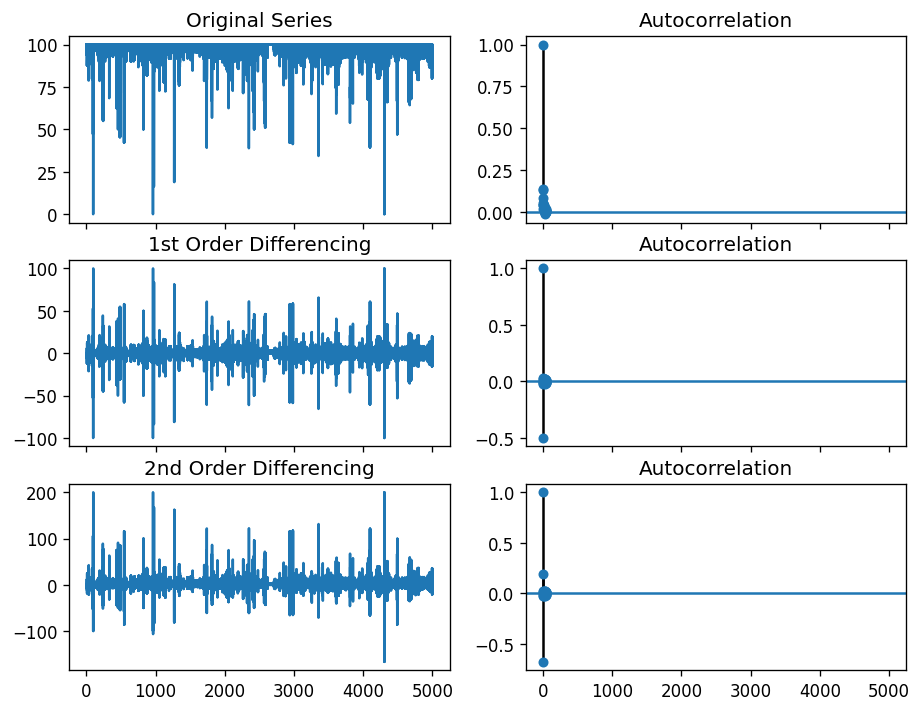

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
rendo=rendo['perc_of_active_connections']
# # Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(rendo); axes[0, 0].set_title('Original Series')
plot_acf(rendo, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(rendo.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(rendo.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(rendo.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(rendo.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [28]:
# Create Training and Test
train = rendo[:24870]
test = rendo[24870:]

In [29]:
# fit model
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1) 
print(fitted.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                  ARIMA Model Results                                   
Dep. Variable:     D.perc_of_active_connections   No. Observations:                24869
Model:                           ARIMA(1, 1, 1)   Log Likelihood              -68795.627
Method:                                 css-mle   S.D. of innovations              3.847
Date:                          Thu, 24 Sep 2020   AIC                         137599.255
Time:                                  10:50:16   BIC                         137631.740
Sample:                                       1   HQIC                        137609.772
                                                                                        
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               1.983e-05      0.000      0.049      0.961    

In [30]:
# Forecast
fc, se, conf = fitted.forecast(41, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

In [31]:
# calculate root mean absolute percentage error
mape = (mean_absolute_error(test, conf[:, 1]))/100
print('Train Score: %.2f MAPE' % (mape))

Train Score: 0.08 MAPE


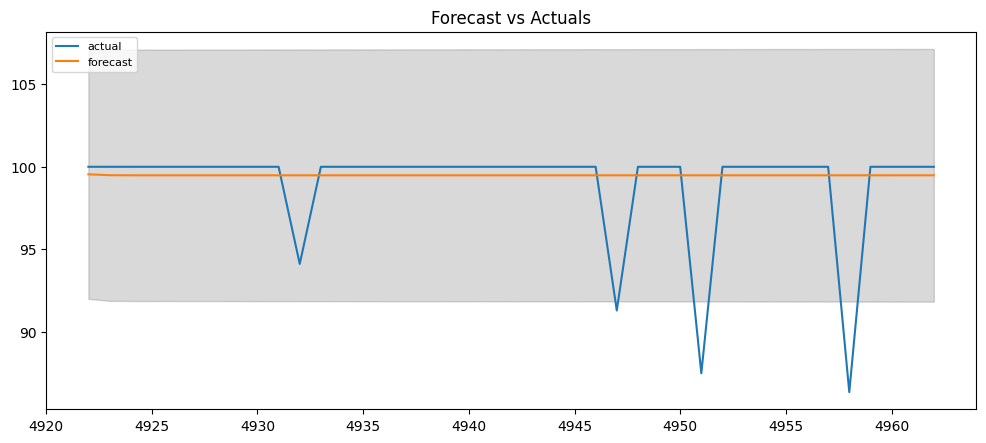

In [32]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Coteq

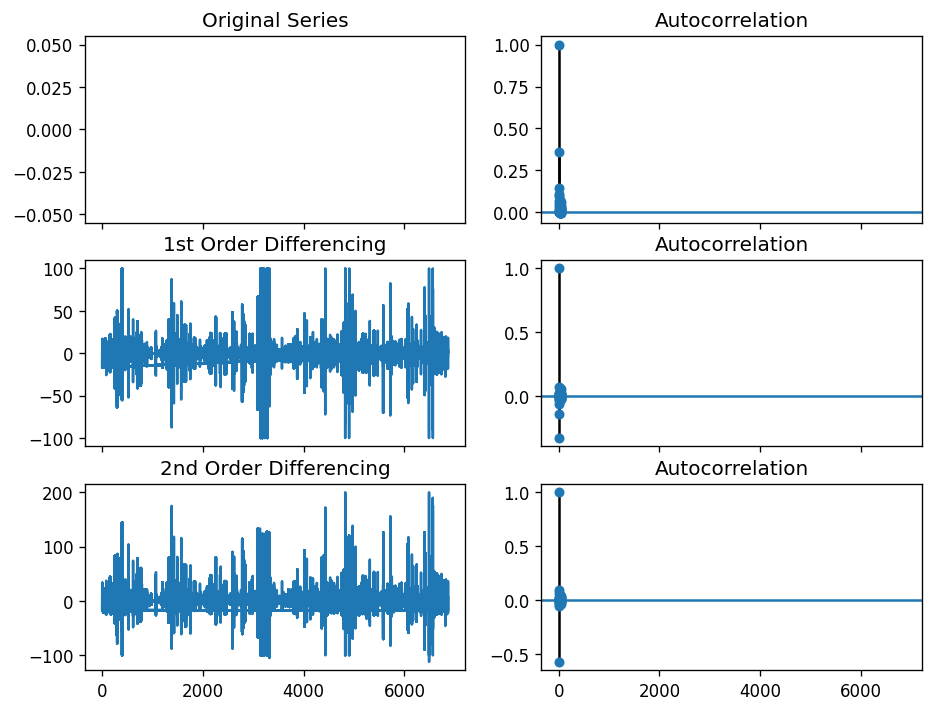

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# # Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
coteq=coteq['perc_of_active_connections']
axes[0, 0].plot(); axes[0, 0].set_title('Original Series')
plot_acf(coteq, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(coteq.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(coteq.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(coteq.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(coteq.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [34]:
# Create Training and Test
train = coteq[:40680]
test = coteq[40680:]
# Forecast
fc, se, conf = fitted.forecast(58, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

In [35]:
# calculate root mean absolute percentage error
mape = (mean_absolute_error(test, conf[:, 1]))/100
print('Train Score: %.2f MAPE' % (mape))

Train Score: 0.09 MAPE


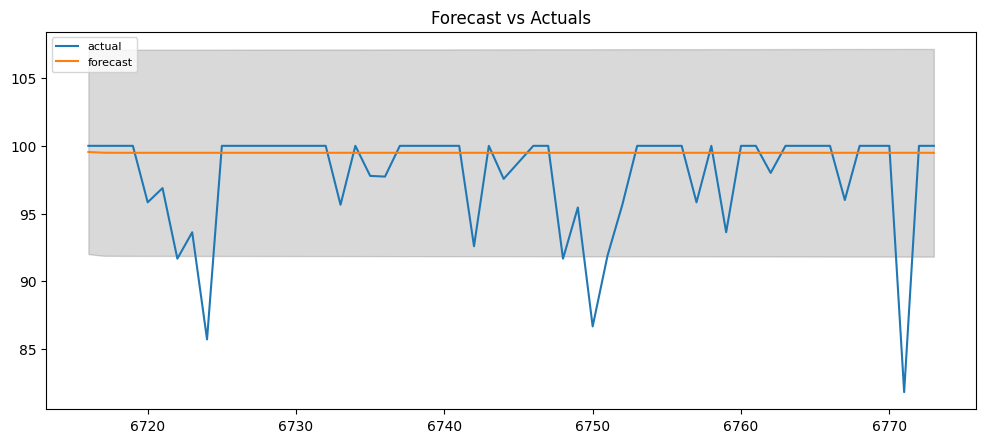

In [36]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Westland-Infra

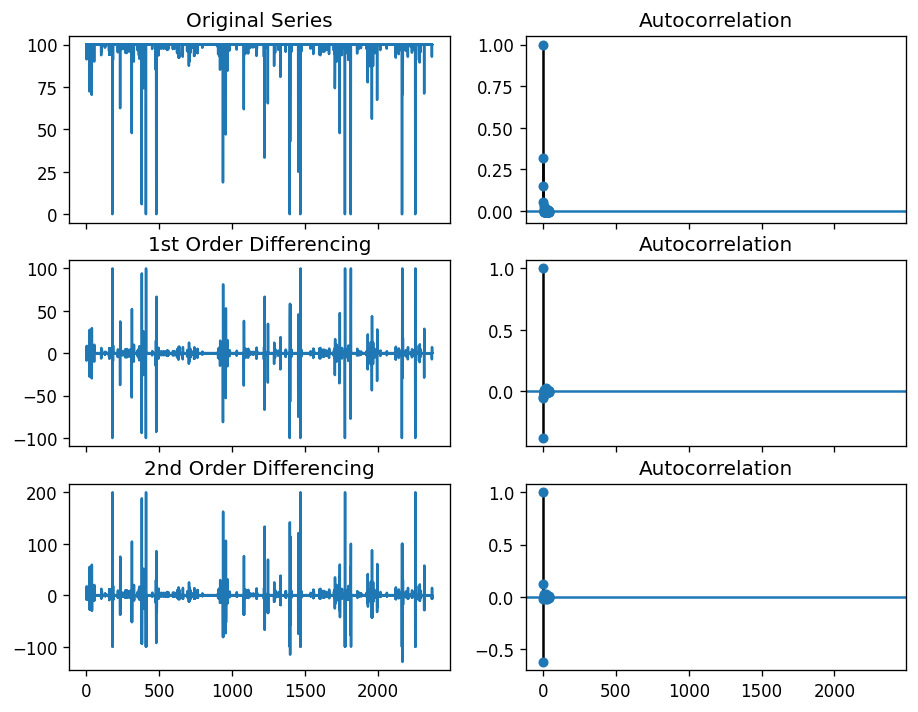

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
westland = westland['perc_of_active_connections']
# # Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(westland); axes[0, 0].set_title('Original Series')
plot_acf(westland, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(westland.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(westland.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(westland.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(westland.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [38]:
# Create Training and Test
train = westland[:13887]
test = westland[13887:]

In [39]:
# Forecast
fc, se, conf = fitted.forecast(40, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

In [40]:
# calculate root mean absolute percentage error
mape = (mean_absolute_error(test, conf[:, 1]))/100
print('Train Score: %.2f MAPE' % (mape))

Train Score: 0.07 MAPE


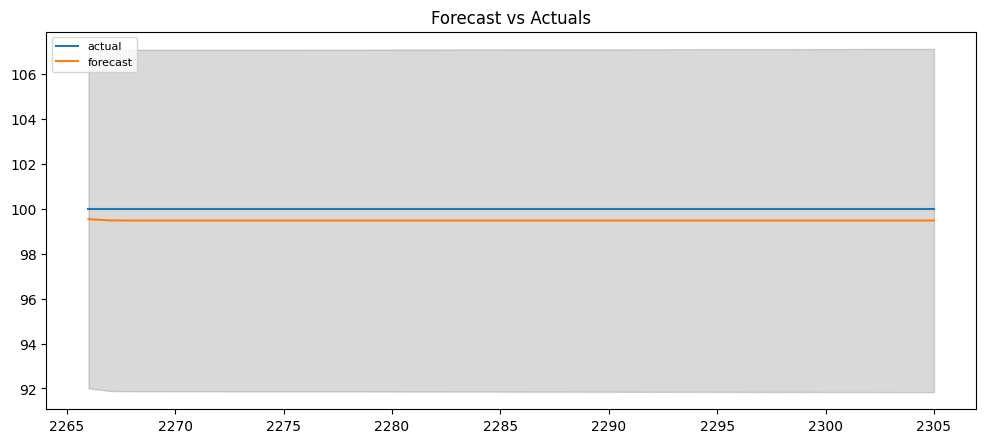

In [41]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()